# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

# descargar informacion
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/144.0.0.0 Safari/537.36 Edg/144.0.0.0'
}

link = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
info = requests.get(link,time.sleep(10),headers=headers)
info



<Response [200]>

In [2]:
# transformacion a tablas

html = io.StringIO(info.text)
tablas = pd.read_html(html)
tablas

[                      Rank                   Song                 Artist(s)  \
 0                        1      "Blinding Lights"                The Weeknd   
 1                        2         "Shape of You"                Ed Sheeran   
 2                        3      "Sweater Weather"         The Neighbourhood   
 3                        4              "Starboy"  The Weeknd and Daft Punk   
 4                        5            "As It Was"              Harry Styles   
 ..                     ...                    ...                       ...   
 96                      97               "Dreams"             Fleetwood Mac   
 97                      98           "Sicko Mode"    Travis Scott and Drake   
 98                      99     "Someone Like You"                     Adele   
 99                     100          "Billie Jean"           Michael Jackson   
 100  As of 31 January 2026  As of 31 January 2026     As of 31 January 2026   
 
         Streams (billions)           

In [3]:
ranking = tablas[0]
ranking.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.263,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.754,6 January 2017,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.358,3 December 2012,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.346,21 September 2016,[4]
4,5,"""As It Was""",Harry Styles,4.231,1 April 2022,[5]


In [4]:
ranking.info()

<class 'pandas.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Rank                101 non-null    str  
 1   Song                101 non-null    str  
 2   Artist(s)           101 non-null    str  
 3   Streams (billions)  101 non-null    str  
 4   Release date        101 non-null    str  
 5   Ref.                100 non-null    str  
dtypes: str(6)
memory usage: 4.9 KB


In [5]:
#Transformacion de dato a su real Dtype, ya que todos estan en str
#primero eliminamos la ultima fila que contiene mala informacion
ranking.tail()

ranking = ranking[ranking['Rank'] != 'As of 31 January 2026']
ranking.tail()



,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
95,96,"""Payphone""",Maroon 5 and Wiz Khalifa,2.538,16 April 2012,[96]
96,97,"""Dreams""",Fleetwood Mac,2.528,4 February 1977,[97]
97,98,"""Sicko Mode""",Travis Scott and Drake,2.528,21 August 2018,[98]
98,99,"""Someone Like You""",Adele,2.515,24 January 2011,[99]
99,100,"""Billie Jean""",Michael Jackson,2.509,2 January 1983,NaN


In [ ]:
ranking['Rank'] = ranking['Rank'].astype(int)
ranking['Streams (billions)'] = ranking['Streams (billions)'].astype(float)
ranking.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                100 non-null    int64  
 1   Song                100 non-null    str    
 2   Artist(s)           100 non-null    str    
 3   Streams (billions)  100 non-null    float64
 4   Release date        100 non-null    str    
 5   Ref.                99 non-null     str    
dtypes: float64(1), int64(1), str(4)
memory usage: 4.8 KB


In [11]:
# Visualizacion con el top 10

top10 = ranking.nlargest(10,'Streams (billions)')
top10

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.263,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.754,6 January 2017,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.358,3 December 2012,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.346,21 September 2016,[4]
4,5,"""As It Was""",Harry Styles,4.231,1 April 2022,[5]
5,6,"""Someone You Loved""",Lewis Capaldi,4.213,8 November 2018,[6]
6,7,"""Sunflower""",Post Malone and Swae Lee,4.108,18 October 2018,[7]
7,8,"""One Dance""",Drake with Wizkid and Kyla,4.017,5 April 2016,[8]
8,9,"""Perfect""",Ed Sheeran,3.815,3 March 2017,[9]
9,10,"""Stay""",The Kid Laroi and Justin Bieber,3.789,9 July 2021,[10]


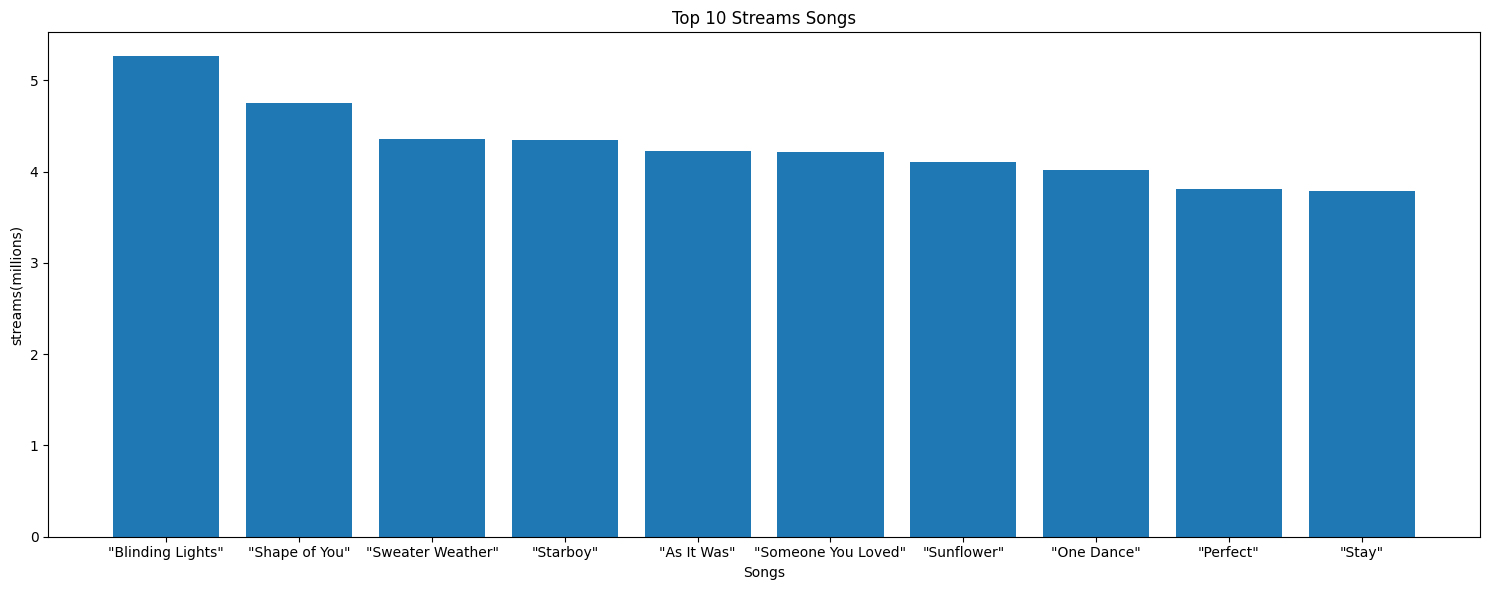

In [19]:
plt.figure(figsize=(15,6))

plt.bar(top10['Song'],top10['Streams (billions)'])
plt.title('Top 10 Streams Songs')
plt.xlabel('Songs')
plt.ylabel('streams(millions)')
plt.tight_layout()
plt.show()

In [20]:
# Almacenamos los datos en SQLite

conn = sqlite3.connect('Canciones')
ranking.to_sql('top',conn,if_exists='replace',index=False)

100